# Embedding layer
    An embedding layer is a type of hidden layer in a neural network. 

     Theoretically, every hidden layer can represent an embedding layer. We can extract an output of any hidden layers and treat it as an embedding vector. Still, the point is not only to lower the input dimension but also to create a meaningful relationship between them.

    Types of Embedding Layers

    - Text embedding
    - Image embedding
    - Graph embedding and others

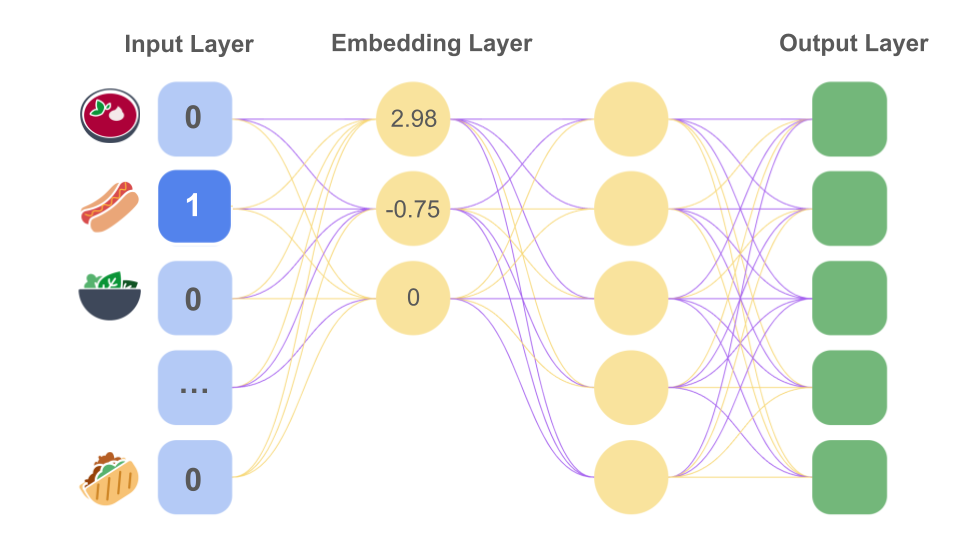

# Text Embeddings
    
    The process of representing text with vectors is called embedding (or encoding).

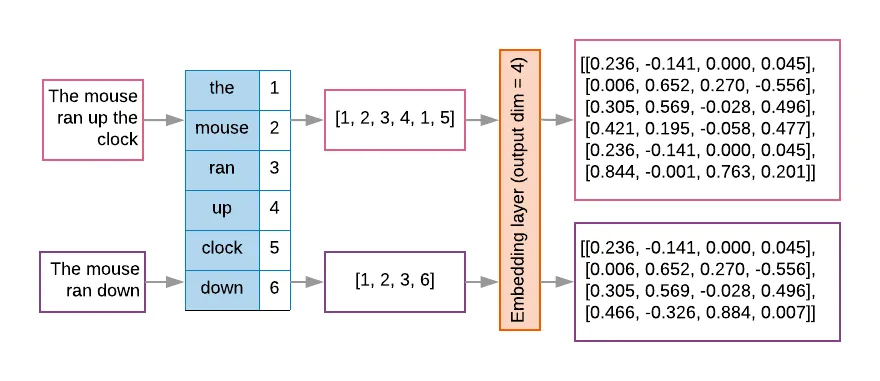 

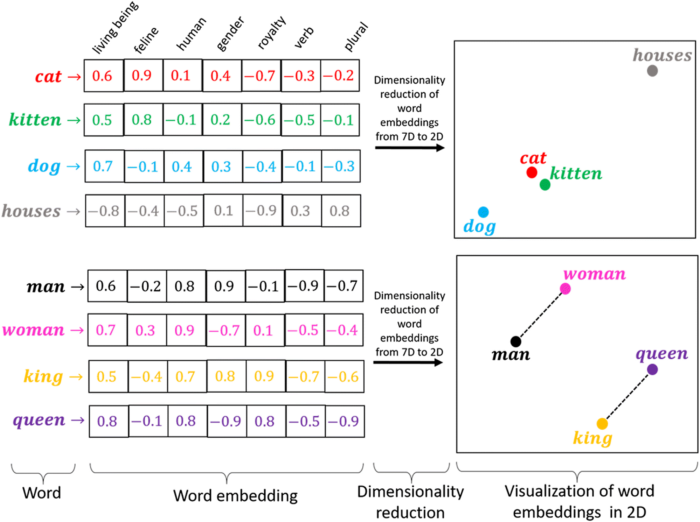

### nn.Embedding
https://pytorch.org/docs/stable/generated/torch.nn.Embedding.html

    torch.nn.Embedding(num_embeddings, embedding_dim, padding_idx=None, max_norm=None, norm_type=2.0, scale_grad_by_freq=False, sparse=False, _weight=None, _freeze=False, device=None, dtype=None)
    
> #### Parameters
>- num_embeddings (int) – size of the dictionary of embeddings
> 
>- embedding_dim (int) – the size of each embedding vector
>  

In [2]:
import torch
import torch.nn as nn

In [3]:
embedding = nn.Embedding(num_embeddings = 10, embedding_dim=5)
print(embedding)

Embedding(10, 5)


In [4]:
embedding.embedding_dim

5

In [5]:
embedding.num_embeddings

10

In [6]:
print(embedding)
print(embedding.weight)

Embedding(10, 5)
Parameter containing:
tensor([[ 0.4594, -0.6621, -0.9092, -0.2941, -1.0431],
        [-1.3525,  0.4399,  1.0128,  1.2093,  0.9033],
        [ 0.0600,  0.8025,  0.2658, -0.1242,  1.3351],
        [-0.3103, -0.5358, -0.5175,  0.2920,  0.3041],
        [-1.1771, -1.0888, -0.9670,  0.2900,  0.2211],
        [-0.4142, -0.9021, -0.1668, -1.2616, -0.8311],
        [-0.7212, -1.2483, -2.4375,  1.9315,  1.3408],
        [ 0.6868,  0.2651,  0.0910,  0.6307, -1.4828],
        [-0.0936, -0.4012, -0.7929,  0.9788, -1.8312],
        [-0.0077,  1.7550, -0.6678, -0.9230,  0.2437]], requires_grad=True)


In [13]:
inputs = torch.LongTensor([1, 2, 4, 5])
print(inputs)
embed = embedding(inputs)
print(embed)

tensor([1, 2, 4, 5])
tensor([[-1.3525,  0.4399,  1.0128,  1.2093,  0.9033],
        [ 0.0600,  0.8025,  0.2658, -0.1242,  1.3351],
        [-1.1771, -1.0888, -0.9670,  0.2900,  0.2211],
        [-0.4142, -0.9021, -0.1668, -1.2616, -0.8311]],
       grad_fn=<EmbeddingBackward0>)


In [14]:
text = "Tokenization is the process of breaking down text into smaller units"
text_fa = "توکن‌سازی فرآیند شکستن متن به واحدهای کوچکتر است"

In [15]:
from transformers import AutoTokenizer
bert_tokenizer   = AutoTokenizer.from_pretrained("bert-base-uncased") # WordPiece 

/Users/mani/anaconda3/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [16]:
embedding_dim = 6

In [17]:
# Tokenize the input text using BERT tokenizer
bert_token = bert_tokenizer.tokenize(text)
print('Token: ', bert_token)

# Convert the text to input IDs (numerical representations)
inputs = bert_tokenizer(text, return_tensors="pt")
input_ids = inputs['input_ids']  # Extract token IDs from the inputs

# Print the token IDs and the total number of tokens
print('\nIDs: ', input_ids)
print("Token Count: ", input_ids.shape[1])

Token:  ['token', '##ization', 'is', 'the', 'process', 'of', 'breaking', 'down', 'text', 'into', 'smaller', 'units']

IDs:  tensor([[  101, 19204,  3989,  2003,  1996,  2832,  1997,  4911,  2091,  3793,
          2046,  3760,  3197,   102]])
Token Count:  14


In [18]:

# Get embeddings for the sentence
embedding = nn.Embedding(bert_tokenizer.vocab_size, embedding_dim)
print(embedding)
word_embeddings = embedding(input_ids)
print("Word Embeddings Shape:", word_embeddings.shape )
print("Word Embeddings:\n", word_embeddings.detach())

Embedding(30522, 6)
Word Embeddings Shape: torch.Size([1, 14, 6])
Word Embeddings:
 tensor([[[ 8.0843e-01,  8.1854e-03,  1.5552e+00, -5.9332e-01, -3.3761e-01,
           5.8202e-01],
         [-1.2192e+00,  1.3293e+00, -4.8110e-01, -5.5320e-01, -1.4104e+00,
          -7.8855e-02],
         [-1.7480e-01,  1.6038e+00, -4.1533e-01, -5.8624e-01,  4.7744e-01,
          -1.2148e+00],
         [ 1.9705e+00,  8.1368e-01,  6.3297e-01, -4.0005e-01, -7.1496e-01,
           7.6470e-01],
         [-1.2070e+00, -1.6016e-01,  5.5001e-01,  1.0860e-01,  1.6978e+00,
           4.6548e-01],
         [-7.7344e-02, -2.3454e+00,  2.2836e-01,  8.9578e-01,  1.1696e+00,
           1.6607e+00],
         [ 5.9380e-01, -1.0355e+00, -1.1864e+00,  2.5956e-01, -1.4794e-01,
           3.6577e-01],
         [-4.6783e-01, -1.0485e+00,  1.1656e+00,  7.1606e-01,  6.5514e-01,
          -2.9015e-02],
         [ 1.2625e-02,  4.3689e-01,  3.1438e-01,  3.8977e-01, -3.6353e-01,
          -2.6394e-01],
         [-2.7762e-01, -8

In [19]:

bert_token = bert_tokenizer.tokenize(text_fa)
print('Token: ',bert_token)

inputs = bert_tokenizer(text_fa, return_tensors="pt")
input_ids = inputs['input_ids']  # Token IDs
print('\nIDs: ',input_ids)
print("Token Count: ", input_ids.shape[1])

# Get embeddings for the sentence
embedding = nn.Embedding(bert_tokenizer.vocab_size, embedding_dim)
print(embedding)
word_embeddings = embedding(input_ids)
print("Word Embeddings Shape:", word_embeddings.shape )
print("Word Embeddings:\n", word_embeddings.detach())

Token:  ['ت', '##و', '##ک', '##ن', '##س', '##ا', '##ز', '##ی', 'ف', '##ر', '##ا', '##ی', '##ن', '##د', 'ش', '##ک', '##س', '##ت', '##ن', 'م', '##ت', '##ن', 'ب', '##ه', 'و', '##ا', '##ح', '##د', '##ه', '##ا', '##ی', 'ک', '##و', '##چ', '##ک', '##ت', '##ر', 'ا', '##س', '##ت']

IDs:  tensor([[  101,  1273, 29836, 29841, 15915, 29824, 25573, 29823, 24830,  1291,
         17149, 25573, 24830, 15915, 15394,  1283, 29841, 29824, 29817, 15915,
          1295, 29817, 15915,  1271, 14157,  1298, 25573, 29820, 15394, 14157,
         25573, 24830,  1304, 29836, 29840, 29841, 29817, 17149,  1270, 29824,
         29817,   102]])
Token Count:  42
Embedding(30522, 6)
Word Embeddings Shape: torch.Size([1, 42, 6])
Word Embeddings:
 tensor([[[ 0.5074,  0.3463,  0.3242,  0.3734, -0.8749, -0.0537],
         [-0.6758,  0.0420,  0.9645,  0.7254, -0.0406,  1.6423],
         [ 0.4805, -1.2210, -1.0053, -0.5107, -0.7104,  0.5021],
         [-0.1872, -0.5688, -1.4745,  0.5743, -0.4995,  0.8383],
         [ 0.1060,

# Embeddings in Pre-Trained Models

    When you access model.embeddings.position_embeddings.weight, it returns the full positional embeddings matrix for the maximum sequence length BERT supports (typically 512 positions)

In [20]:
import torch
from transformers import BertTokenizer, BertModel

In [21]:
# Step 1: Load Pretrained Tokenizer and Model
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')

print('Tokens: ',tokenizer.tokenize(text))
# Step 2: Tokenize and Get Vocabulary Indices (Input IDs)
inputs = tokenizer(text, return_tensors="pt")
input_ids = inputs['input_ids']  # Token IDs
print("Input IDs:", input_ids)


Tokens:  ['token', '##ization', 'is', 'the', 'process', 'of', 'breaking', 'down', 'text', 'into', 'smaller', 'units']
Input IDs: tensor([[  101, 19204,  3989,  2003,  1996,  2832,  1997,  4911,  2091,  3793,
          2046,  3760,  3197,   102]])


In [22]:
print(tokenizer)

BertTokenizer(name_or_path='bert-base-uncased', vocab_size=30522, model_max_length=512, is_fast=False, padding_side='right', truncation_side='right', special_tokens={'unk_token': '[UNK]', 'sep_token': '[SEP]', 'pad_token': '[PAD]', 'cls_token': '[CLS]', 'mask_token': '[MASK]'}, clean_up_tokenization_spaces=True),  added_tokens_decoder={
	0: AddedToken("[PAD]", rstrip=False, lstrip=False, single_word=False, normalized=False, special=True),
	100: AddedToken("[UNK]", rstrip=False, lstrip=False, single_word=False, normalized=False, special=True),
	101: AddedToken("[CLS]", rstrip=False, lstrip=False, single_word=False, normalized=False, special=True),
	102: AddedToken("[SEP]", rstrip=False, lstrip=False, single_word=False, normalized=False, special=True),
	103: AddedToken("[MASK]", rstrip=False, lstrip=False, single_word=False, normalized=False, special=True),
}


In [23]:
model = BertModel.from_pretrained('bert-base-uncased')

In [24]:
model.embeddings

BertEmbeddings(
  (word_embeddings): Embedding(30522, 768, padding_idx=0)
  (position_embeddings): Embedding(512, 768)
  (token_type_embeddings): Embedding(2, 768)
  (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
  (dropout): Dropout(p=0.1, inplace=False)
)

In [25]:
word_embeddings = model.embeddings.word_embeddings.weight
print("word Embeddings:\n", word_embeddings,"Shape:", word_embeddings.shape)

word Embeddings:
 Parameter containing:
tensor([[-0.0102, -0.0615, -0.0265,  ..., -0.0199, -0.0372, -0.0098],
        [-0.0117, -0.0600, -0.0323,  ..., -0.0168, -0.0401, -0.0107],
        [-0.0198, -0.0627, -0.0326,  ..., -0.0165, -0.0420, -0.0032],
        ...,
        [-0.0218, -0.0556, -0.0135,  ..., -0.0043, -0.0151, -0.0249],
        [-0.0462, -0.0565, -0.0019,  ...,  0.0157, -0.0139, -0.0095],
        [ 0.0015, -0.0821, -0.0160,  ..., -0.0081, -0.0475,  0.0753]],
       requires_grad=True) Shape: torch.Size([30522, 768])


# Example: Text Generation

Token indices sequence length is longer than the specified maximum sequence length for this model (14657 > 512). Running this sequence through the model will result in indexing errors
/Users/mani/anaconda3/lib/python3.11/site-packages/torch/nn/modules/rnn.py:88: UserWarning: dropout option adds dropout after all but last recurrent layer, so non-zero dropout expects num_layers greater than 1, but got dropout=0.1 and num_layers=1
  warnings.warn("dropout option adds dropout after all but last "


Epoch [1/10], Loss: 6.0007
Epoch [2/10], Loss: 4.0916
Generated Text after Epoch 2:
علی کریمیپس از سوی کمیته انضباطی باشگاه پرسپولیس ، از این تیم در بازی در لیگ دسته فوتبال آ ##سیا ##یی ، کریمی در لیگ را به پایان بازی [ZWNJ] های آ ##سیا ، کریمی در سال ۲۰۱۷ ، به میدان رفت . [ نیازمند ] در هفته از تیم ملی دعوت شد . کریمی ، در لیگ قهرمانان اروپا [ZWNJ] های آ ##سیا ، از آ ##لم ##ان ، [ ۳۱ ] او پس از آ ##غا ##ز گرفت ، [ ۱۷ ] با گذشت ۱۶ هفته و در بازی در بازی [ZWNJ] های آ ##سیا ، از لیگ قهرمانان اروپا برای به میدان رفت [ZWNJ] های آ ##خری ##ن به پایان بازی [ZWNJ] لیگا شد . کریمی در لیگ ، [ ۲۸ ] او همچنین در مقابل برق شیراز حضور در مقابل تاجیکستان کریمی را به پایان رسید ، به ثمر رساند . [ ۲۸ ] با آ ##غا ##ز گرفت و آ ##ذی ##ن که به تیم ملی در بازی با ارسال کرد . [ ۲۸ ] کریمی برای این تیم ملی ایران به ثمر رساند و به ثمر رساند . [ ۲۸ ] کریمی در سال ۱۳۷۵ به تیم منتخب گل به عنوان آ ##غا ##ز گرفت [ZWNJ] ها در مقابل کای ##زر ##ان در مقابل برق شیراز به عنوان بهترین نمره [UNK] کریمی پس از کریمی در لیگ 

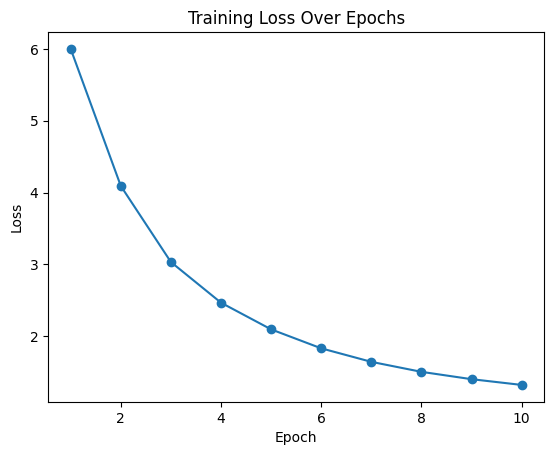

In [16]:
import torch
from torch.utils.data import Dataset, DataLoader
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt
from transformers import AutoTokenizer

# Dataset Class
class WordDataset(Dataset):
    def __init__(self, text, seq_length, tokenizer):
        self.text = text
        self.seq_length = seq_length
        self.tokenizer = tokenizer
        
        # Tokenize and convert to token IDs
        self.tokens = self.tokenizer(text)['input_ids']
        
        # Use the tokenizer's vocabulary directly
        self.vocab_size = len(self.tokenizer.get_vocab())
        
        # Prepare data as a sequence of indices
        self.data = self.tokens

    def __len__(self):
        return len(self.data) - self.seq_length

    def __getitem__(self, idx):
        seq = self.data[idx:idx + self.seq_length]
        target = self.data[idx + 1:idx + self.seq_length + 1]
        return torch.tensor(seq, dtype=torch.long), torch.tensor(target, dtype=torch.long)

# GRU Model
class GRUModel(nn.Module):
    def __init__(self, vocab_size, hidden_size, num_layers=1, dropout=0.1):
        super(GRUModel, self).__init__()
        self.hidden_size = hidden_size
        self.num_layers = num_layers
        
        # Embedding layer
        self.embedding = nn.Embedding(vocab_size, hidden_size)
        
        # GRU layer with dropout
        self.gru = nn.GRU(hidden_size, hidden_size, num_layers, batch_first=True, dropout=dropout)
        
        # Fully connected layer for final output
        self.fc = nn.Linear(hidden_size, vocab_size)

    def forward(self, x, hidden=None):
        x = self.embedding(x)
        out, hidden = self.gru(x, hidden)
        out = self.fc(out)
        return out, hidden

    def init_hidden(self, batch_size):
        return torch.zeros(self.num_layers, batch_size, self.hidden_size).to(device)

# Text generation function with top-k sampling
def generate_text(model, start_text, length, temperature=1.0, tokenizer=None, top_k=5):
    model.eval()
    hidden = model.init_hidden(1)
    
    # Tokenize the input text
    input_seq = torch.tensor(tokenizer.encode(start_text, add_special_tokens=False), dtype=torch.long).unsqueeze(0).to(device)
    generated_text = start_text

    with torch.no_grad():
        for _ in range(length):
            output, hidden = model(input_seq, hidden)
            output = output[:, -1, :] / temperature
            probs = nn.functional.softmax(output, dim=-1).squeeze()
            
            # Top-k sampling to filter out unlikely tokens
            top_k_probs, top_k_indices = torch.topk(probs, top_k)
            top_k_probs = top_k_probs / top_k_probs.sum()  # Normalize the top-k probabilities
            char_idx = top_k_indices[torch.multinomial(top_k_probs, 1)].item()
            
            word = tokenizer.decode([char_idx])
            generated_text += word + ' '
            
            input_seq = torch.tensor([char_idx], dtype=torch.long).unsqueeze(0).to(device)

    return generated_text

# Load the tokenizer
tokenizer = AutoTokenizer.from_pretrained('HooshvareLab/bert-fa-zwnj-base')

# Load the text data
with open('ali_karimi.txt', 'r', encoding='utf-8') as f:
    ali_karimi = f.read()

# Initialize dataset and dataloader
seq_length = 100
batch_size = 64
dataset = WordDataset(ali_karimi, seq_length, tokenizer)
dataloader = DataLoader(dataset, batch_size=batch_size, shuffle=True)

# Model hyperparameters
hidden_size = 50
num_layers = 1
num_epochs = 10
learning_rate = 0.002

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Instantiate model, loss, and optimizer
model = GRUModel(vocab_size=tokenizer.vocab_size, hidden_size=hidden_size, num_layers=num_layers).to(device)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=learning_rate)


# Training loop
losses = []
for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0

    # Iterate over the data loader
    for inputs, targets in dataloader:
        batch_size = inputs.size(0)  # Dynamically get the batch size
        
        # Initialize the hidden state based on the current batch size
        hidden = model.init_hidden(batch_size)
        
        # Move inputs and targets to the appropriate device
        inputs, targets = inputs.to(device), targets.to(device)
        
        # Zero the gradients for the optimizer
        optimizer.zero_grad()

        # Detach hidden state to prevent backpropagation through the entire history
        hidden = hidden.detach()
        
        # Get model outputs and updated hidden state
        outputs, hidden = model(inputs, hidden)
        
        # Compute the loss
        loss = criterion(outputs.view(-1, tokenizer.vocab_size), targets.view(-1))
        
        # Backpropagate the loss
        loss.backward()
        
        # Update model parameters
        optimizer.step()
        
        # Accumulate running loss
        running_loss += loss.item()
    
    # Calculate average loss for this epoch
    epoch_loss = running_loss / len(dataloader)
    losses.append(epoch_loss)
    
    # Print loss for the current epoch
    print(f"Epoch [{epoch+1}/{num_epochs}], Loss: {epoch_loss:.4f}")
    
    # Generate and print text every 2 epochs
    if (epoch + 1) % 2 == 0:
        start_text = "علی کریمی"
        generated_text = generate_text(model, start_text, length=400, tokenizer=tokenizer)
        print(f"Generated Text after Epoch {epoch+1}:\n{generated_text}\n")


# Plotting loss
plt.plot(range(1, num_epochs + 1), losses, marker='o')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training Loss Over Epochs')
plt.show()


In [19]:
# model.embedding.weight

Parameter containing:
tensor([[ 1.0120, -0.2747,  1.1525,  ..., -1.6026,  0.2544,  0.4303],
        [ 0.2765, -0.8097, -0.3032,  ...,  0.6949,  0.5746, -0.8809],
        [ 1.7915,  1.9329, -0.0487,  ..., -1.2870, -1.5619, -0.9972],
        ...,
        [-1.0289,  0.1326, -1.2593,  ..., -2.9191, -0.0036, -1.3059],
        [-2.0229,  0.9392, -1.3821,  ..., -0.3412, -0.4007,  0.7357],
        [-0.3533,  1.4904, -0.1906,  ..., -0.1300, -0.3961,  1.1367]],
       requires_grad=True)

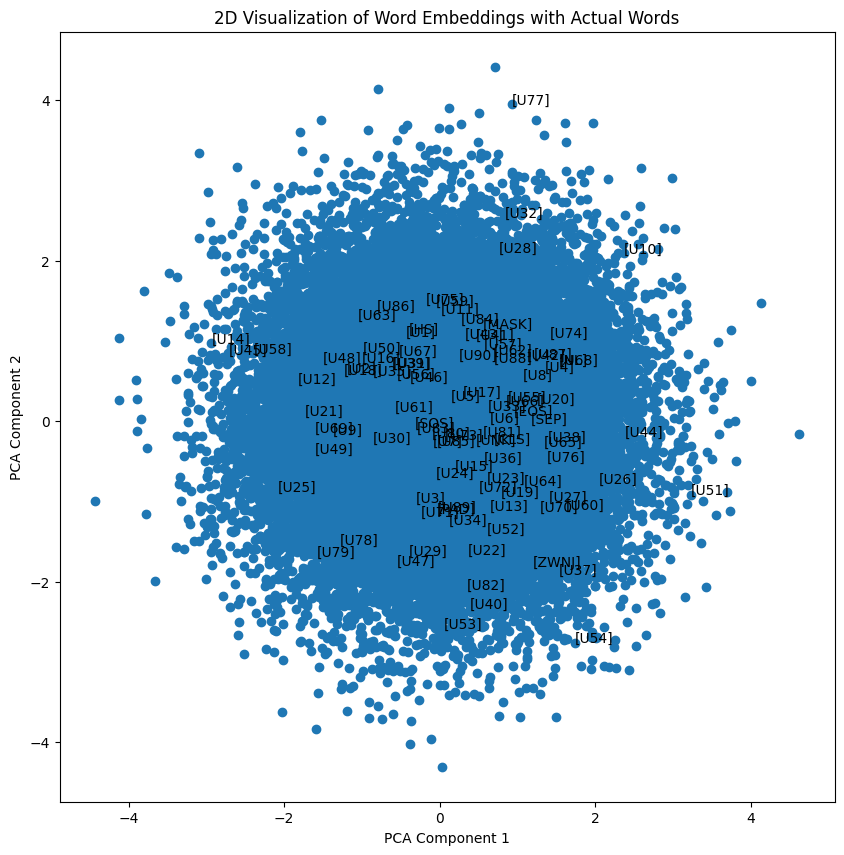

In [27]:
import torch
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

# Sample word embeddings (assuming you have already obtained them)
# Suppose `word_embeddings` is a 2D tensor of shape (num_words, embedding_dim)
# Example for 100 words with 768-dimensional embeddings from BERT or any model
num_words = 100  # for simplicity, let's visualize 100 words
embedding_dim = 768  # example embedding size for BERT
word_embeddings = (model.embedding.weight).detach().numpy() 

# Option 1: Using PCA for dimensionality reduction
pca = PCA(n_components=2)
word_embeddings_2d = pca.fit_transform(word_embeddings)

# Option 2: Using t-SNE for dimensionality reduction
# tsne = TSNE(n_components=2)
# word_embeddings_2d = tsne.fit_transform(word_embeddings)

 # Assuming you have a tokenizer object

# Get the actual words (tokens) corresponding to the embeddings
words = [tokenizer.decode([i]) for i in range(num_words)]

# Now plot as before
plt.figure(figsize=(10, 10))
plt.scatter(word_embeddings_2d[:, 0], word_embeddings_2d[:, 1])

# Adding the actual words instead of generic names
for i, word in enumerate(words):
    plt.text(word_embeddings_2d[i, 0], word_embeddings_2d[i, 1], word)

plt.title('2D Visualization of Word Embeddings with Actual Words')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.show()


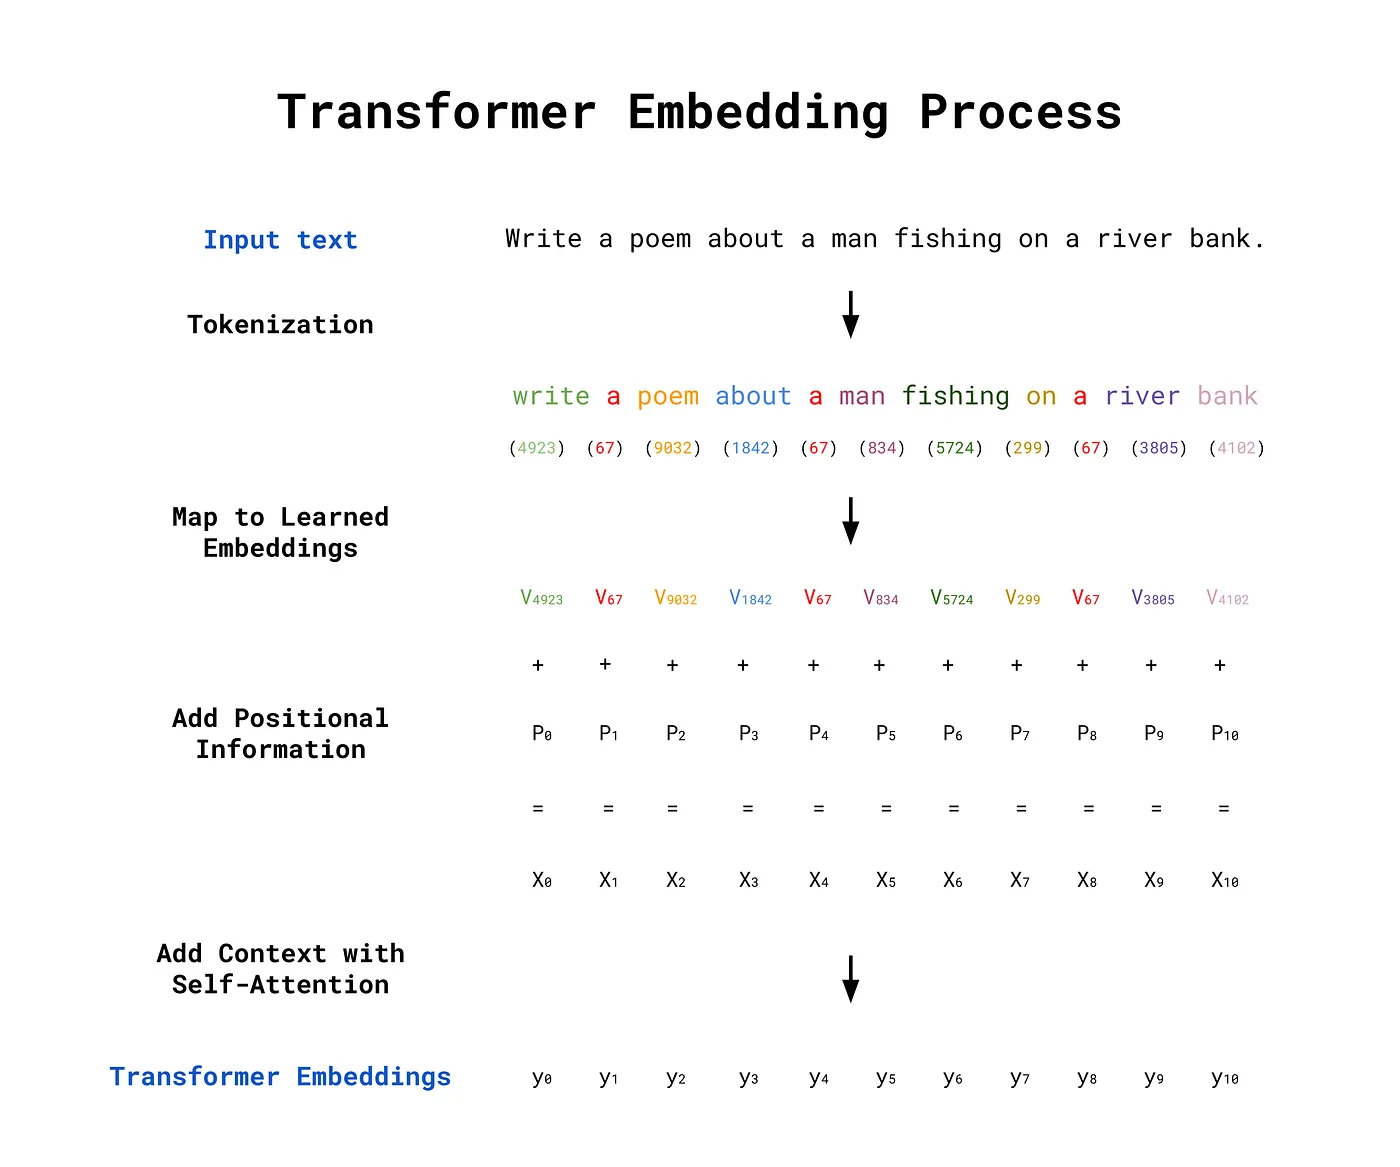